#ML4Net - Lab 1

## Team members

Marc Mallol 268923 | Jordi Esteve 268829 | Albert Jané 268537

## Description

In this lab, you are going to get introduced into Multi-Armed Bandits (MABs) and Wi-Fi simulations. More specifically, you are going to implement a MAB algorithm that performs channel allocation in an Overlapping Basic Service Set (OBSS), i.e., in a scenario where multiple independent BSSs coexist.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   Submission deadline: 18 May 2025 (EoB).

## Setting up the environment

# IMPORTATNT !!!!!!  ALBERT I JORDI

Abans de res fares, el set-up està preparat per utilitzar google colab, però amb uns canvis podem utilitzar-ho en local

Però per fer-ho correr heu de correr el Visual Studio amb la màquina de Linux (wsl), si no tot us petarà.
Per fer-ho és senzill, aneu a la terminal del VS, i obriu el wsl, escriviu `wsl`

Després ara amb la termina de linux escriviu `code .`

I se us obrirà una nova pestanya del VS, on a d'alt hauria de posar `ML4Net-2025 [WSL: Ubuntu]`

Suposo que s'haurà d'entregar amb colab però, així que s'haurà de traduir els paths i tal, però suposo que serà un moment.

Llavors tot okey, podeu seguir, si algo envieu-me un whats

In [ ]:
# ┌──────────────────────────────────────────────────────────────────┐
# │              Notebook Setup Cell for Lab1 (All-in-One)         │
# └──────────────────────────────────────────────────────────────────┘

import os, sys, urllib.request, zipfile, platform, subprocess

# 1) Define your Lab1 directory (relative to notebook)
lab_dir = os.path.join(os.getcwd(), "Lab1")
os.makedirs(lab_dir, exist_ok=True)

# 2) Download ZIP if needed
zip_url = "https://github.com/fwilhelmi/fwilhelmi.github.io/raw/refs/heads/master/files/Komondor-lightweight.zip"
zip_fp  = os.path.join(lab_dir, "Komondor-lightweight.zip")

if not os.path.exists(zip_fp):
    print(f"Downloading Komondor to {zip_fp}…")
    urllib.request.urlretrieve(zip_url, zip_fp)
else:
    print("ZIP already exists; skipping download.")

# 3) Unzip
print(f"Extracting {zip_fp} → {lab_dir} …")
with zipfile.ZipFile(zip_fp, 'r') as z:
    z.extractall(lab_dir)

# 4) Build
main_dir = os.path.join(lab_dir, "main")
if platform.system() != "Windows":
    print("Setting POSIX permissions and building…")
    subprocess.run(["chmod", "-R", "777", lab_dir], check=True)
    subprocess.run(["bash", "-lc", f"cd '{main_dir}' && ./build_local"], check=True)
else:
    print("Windows detected: please open a POSIX shell (WSL/Git-bash) and run:")
    print(f"    cd \"{main_dir}\" && ./build_local")

print("\n✅ Setup complete! Your Lab1 directory is:", lab_dir)


: 

## How to run simulations

Komondor can be run by calling its compiled main file ("komondor_main") and indicating the value for different flags.

Next, you will see two different ways of running Komondor, depending on whether MAB Agents are instantiated or not.

In any case, **it is important to know** that:


*   Any input files used by the simulator will be located in the `/input` folder.
*   Any output files generated by the simulator will be located in the `/output` folder.

Apart from that, Komondor generates a set of console logs that give meaningful information.


### 1) Simulations without agents

To simulate specific scenarios (described using "input node" files) **without agents**, one must indicate the following flags:

In [2]:
# ┌───────────────────────────────────────────────────────────────┐
# │        Komondor Simulation (Python-cell version)            │
# └───────────────────────────────────────────────────────────────┘

import os
import subprocess
from pathlib import Path

# 1) Define paths
repo_root   = Path.cwd()                 # wherever your notebook lives
lab1        = repo_root / "Lab1"
main_dir    = lab1 / "main"
input_csv   = lab1 / "input" / "input_nodes.csv"
output_txt  = lab1 / "output" / "logs_test.txt"

# 2) Make sure output folder exists
output_txt.parent.mkdir(parents=True, exist_ok=True)

# 3) Build up the command
cmd = [
    str(main_dir / "komondor_main"),
    str(input_csv),
    str(output_txt),
    "AAX-LAB1",         # SIMULATION_CODE
    "1",                # FLAG_SAVE_NODE_LOGS
    "1",                # FLAG_PRINT_SYSTEM_LOGS
    "1",                # FLAG_PRINT_NODE_LOGS
    "100",              # SIM_TIME
    "7",                # SEED
]

print("Running simulation:\n >", " ".join(cmd), "\n")
# 4) Launch it
res = subprocess.run(cmd, cwd=main_dir)

if res.returncode == 0:
    print("✅ Done! See logs at", output_txt)
else:
    print("❌ Simulation exited with code", res.returncode)

Running simulation:
 > /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/main/komondor_main /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_test.txt AAX-LAB1 1 1 1 100 7 


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS DISABLED).
 Komondor input configuration:
  - nodes_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv
  - agents_enabled: 0
  - script_output_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_test.txt
  - simulation_code: AAX-LAB1
  - save_node_logs: 1
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.000000 s

### 2) Simulations with agents (used for keeping track of temporary performance)

To simulate specific scenarios (described using "input node" files) **with agents**, one must indicate the following flags:

Run the simulation

In [3]:
# ┌───────────────────────────────────────────────────────────────────────────┐
# │  Komondor Simulation with Agents (auto‐WSL on Windows, native elsewhere) │
# └───────────────────────────────────────────────────────────────────────────┘

import os, subprocess, platform
from pathlib import Path

# 1) Define repo structure
repo_root    = Path.cwd()                          # where this notebook lives
lab1         = repo_root / "Lab1"
main_dir     = lab1 / "main"
input_nodes  = lab1 / "input"  / "input_nodes.csv"
input_agents = lab1 / "input"  / "agents_monitoring.csv"
output_logs  = lab1 / "output" / "logs_test_agents.txt"

# ensure output folder exists
output_logs.parent.mkdir(parents=True, exist_ok=True)

# helper to map Windows paths to WSL
def to_wsl(p: Path) -> str:
    pu = p.as_posix()      # "C:/Users/…"
    drive, rest = pu.split(":",1)
    return f"/mnt/{drive.lower()}{rest}"

# build & run
if platform.system() == "Windows":
    # invoke under WSL
    wmain   = to_wsl(main_dir)
    wnodes  = to_wsl(input_nodes)
    wagents = to_wsl(input_agents)
    wout    = to_wsl(output_logs)
    bash_cmd = (
        f"cd '{wmain}' && "
        f"./komondor_main {wnodes} {wagents} {wout} "
        f"AAX-LAB1-AGENTS 0 0 1 1 1 100 7"
    )
    print("Running in WSL:\n  wsl bash -lc", bash_cmd, "\n")
    res = subprocess.run(["wsl","bash","-lc", bash_cmd])
else:
    # run natively
    cmd = [
      str(main_dir/"komondor_main"),
      str(input_nodes),
      str(input_agents),
      str(output_logs),
      "AAX-LAB1-AGENTS",  # SIMULATION_CODE
      "0",  # FLAG_SAVE_NODE_LOGS
      "0",  # FLAG_SAVE_AGENT_LOGS
      "1",  # FLAG_PRINT_SYSTEM_LOGS
      "1",  # FLAG_PRINT_NODE_LOGS
      "1",  # FLAG_PRINT_AGENT_LOGS
      "100",# SIM_TIME
      "7"   # SEED
    ]
    print("Running natively:\n ", " ".join(cmd), "\n")
    res = subprocess.run(cmd, cwd=main_dir)

if res.returncode == 0:
    print("✅ Done! Agent‐enabled logs →", output_logs)
else:
    print("❌ Error (code:", res.returncode,")")


Running natively:
  /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/main/komondor_main /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_monitoring.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_test_agents.txt AAX-LAB1-AGENTS 0 0 1 1 1 100 7 


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_monitoring.csv
  - script_output_filename: /mnt/c/Us

## EXERCISES

### Exercise 1:
Run the simulator (without agents) for the provided input nodes file (`/input/input_nodes.csv`). Before running the simulation, activate the flag that allows saving node logs into a file. After running the simulation, use the information from the log files of each node (e.g., AP_A, STA_A1, AP_B, STA_B1) to plot the scenario. To make the plot, consider the position of the nodes, the channel used, and the power strength that each node perceives from each other node in the deployment.

*Note: To know the power strength perceived by a given device (e.g., AP A) from any other devices (e.g., STA A1, AP B, STA B1), check the logs of that node and identify the cases where other nodes are detected to start/stop a transmission.*

In [55]:
import shutil
from pathlib import Path
# ────────────────────────────────────────────────────────────────────────────────
# 0) Clean out the old output folder so logs don’t append
lab_dir   = Path("Lab1")
out_dir   = lab_dir / "output"
# Remove the entire output folder (and everything inside), then recreate it
if out_dir.exists():
    shutil.rmtree(out_dir)
out_dir.mkdir(parents=True, exist_ok=True)
print("Cleared:", out_dir)

Cleared: Lab1/output


In [56]:
# (response to exercise 1)

import os, subprocess, platform
from pathlib import Path

# ── adjust if your notebook lives elsewhere ────────────────────────┐
repo_root  = Path.cwd()  
lab1       = repo_root / "Lab1"
main_dir   = lab1 / "main"
input_csv  = lab1 / "input"  / "input_nodes.csv"
output_txt = lab1 / "output" / "logs_noagents.txt"
# ────────────────────────────────────────────────────────────────────┘

# make sure output folder exists
output_txt.parent.mkdir(parents=True, exist_ok=True)

# helper to convert Windows paths → WSL
def to_wsl(p: Path) -> str:
    pu = p.as_posix()              # e.g. "C:/…"
    drive, rest = pu.split(":", 1)
    return f"/mnt/{drive.lower()}{rest}"

# build & dispatch
if platform.system() == "Windows":
    wmain  = to_wsl(main_dir)
    wnodes = to_wsl(input_csv)
    wout   = to_wsl(output_txt)
    bash = (
        f"cd '{wmain}' && "
        f"./komondor_main {wnodes} {wout} "
        f"AAX-LAB1   "  # SIM_CODE
        f"1  1  1  "    # SAVE_NODE_LOGS=1, PRINT_SYS=1, PRINT_NODE=1
        f"100  7"       # SIM_TIME, SEED
    )
    print("Launching under WSL:\n  wsl bash -lc", bash, "\n")
    res = subprocess.run(["wsl","bash","-lc", bash])
else:
    cmd = [
      str(main_dir/"komondor_main"),
      str(input_csv),
      str(output_txt),
      "AAX-LAB1", "1", "1", "1", "100", "7"
    ]
    print("Launching natively:\n ", " ".join(cmd), "\n")
    res = subprocess.run(cmd, cwd=main_dir)

if res.returncode!=0:
    raise RuntimeError(f"Simulation failed (exit {res.returncode})")
print("✅ Simulation complete; node logs are in", lab1/"output")

Launching natively:
  /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/main/komondor_main /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_noagents.txt AAX-LAB1 1 1 1 100 7 


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS DISABLED).
 Komondor input configuration:
  - nodes_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv
  - agents_enabled: 0
  - script_output_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_noagents.txt
  - simulation_code: AAX-LAB1
  - save_node_logs: 1
  - print_system_logs: 1
  - print_node_logs: 1
  - sim_time: 100.0

  logs_output__N0_AP_A.txt → filtered_AP_A.log (38709.7 KB)
  logs_output__N1_STA_A1.txt → filtered_STA_A1.log (37607.9 KB)
  logs_output__N2_AP_B.txt → filtered_AP_B.log (38735.5 KB)
  logs_output__N3_STA_B1.txt → filtered_STA_B1.log (37636.6 KB)
AP_A
STA_A1
AP_B
STA_B1


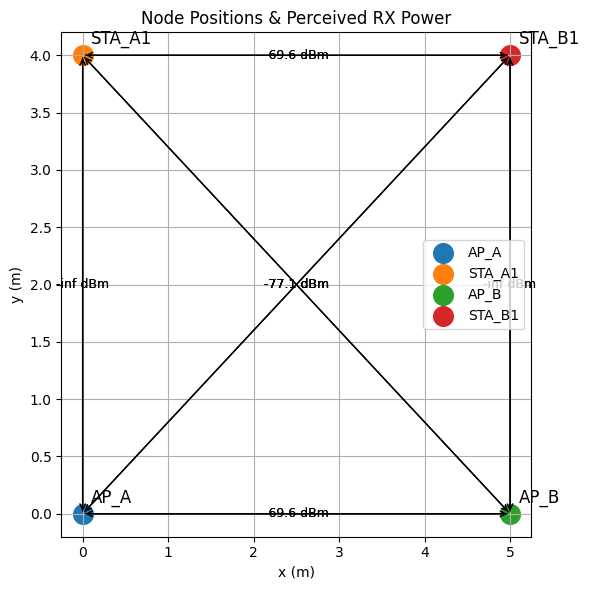

In [57]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Paths (fix: add extra Lab1)
raw_dir      = Path("Lab1/output")
filtered_dir = raw_dir

# 2) Filter raw logs down to only the lines we need
keep_pat = ["InportSomeNodeStartTX", "Power sensed per channel"]
for raw in raw_dir.glob("logs_output__*_*.*"):
    nid_and_node = raw.stem.split("__", 1)[1]
    node = nid_and_node.split("_", 1)[1]
    outf = filtered_dir / f"filtered_{node}.log"
    with raw.open() as rf, outf.open("w") as wf:
        for L in rf:
            if any(p in L for p in keep_pat):
                wf.write(L)
    print(f"  {raw.name} → {outf.name} ({outf.stat().st_size/1024:.1f} KB)")

# 3) Load node positions (fix: add extra Lab1)
nodes = pd.read_csv("Lab1/input/input_nodes.csv", sep=";")

# ...rest of your code unchanged...

# 4) Parse & plot
id_map = {"N0":"AP_A","N1":"STA_A1","N2":"AP_B","N3":"STA_B1"}
records = []

for _, r in nodes.iterrows():
    receiver = r["node_code"]
    print(receiver)
    fpath    = filtered_dir / f"filtered_{receiver}.log"
    last_tx  = None
    if not fpath.exists():
        print(f"⚠️ Missing {fpath.name}")
        continue    
    for line in fpath.open():
        if "InportSomeNodeStartTX" in line:
            
            m = re.search(r"InportSomeNodeStartTX.*(N\d+).*power of\s*([\d.]+)\s*dBm", line)
            if m:
                last_tx = (m.group(1), float(m.group(2)))
        elif "Power sensed per channel [dBm]:" in line and last_tx:
            
            split_line = line.split("Power sensed per channel [dBm]:",1)
            if len(split_line) > 1:
                parts = split_line[1].split()
                try:
                    pwr = float(parts[0])
                    tx  = id_map[last_tx[0]]
                
                    if tx != receiver:
                        records.append({
                            "receiver":    receiver,
                            "transmitter": tx,
                            "power_dBm":   pwr
                        })
                except ValueError:
                    pass
            last_tx = None
# ...existing code...

import pandas as pd
import matplotlib.pyplot as plt

# ...existing code to build 'records'...

# Keep only the strongest (max power) detection per (receiver, transmitter)
df = pd.DataFrame(records)
if df.empty:
    raise RuntimeError("No detections found in filtered logs—check the filenames!")
df = df.sort_values('power_dBm', ascending=False).drop_duplicates(['receiver', 'transmitter'])

plt.figure(figsize=(6,6))
for _, r in nodes.iterrows():
    plt.scatter(r["x(m)"], r["y(m)"], s=200, marker="o", label=r["node_code"])
    plt.text(r["x(m)"]+0.1, r["y(m)"]+0.1, r["node_code"], fontsize=12)
for _, ev in df.iterrows():
    rx = nodes.set_index("node_code").loc[ev["receiver"]]
    tx = nodes.set_index("node_code").loc[ev["transmitter"]]
    plt.annotate("", xy=(rx["x(m)"],rx["y(m)"]),
                      xytext=(tx["x(m)"],tx["y(m)"]),
                      arrowprops=dict(arrowstyle="->", lw=1))
    mx, my = (rx["x(m)"]+tx["x(m)"])/2, (rx["y(m)"]+tx["y(m)"])/2
    plt.text(mx, my, f"{ev['power_dBm']:.1f} dBm", fontsize=9, ha="center", va="center")
plt.title("Node Positions & Perceived RX Power")
plt.xlabel("x (m)"); plt.ylabel("y (m)")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

### Comment – Exercise 1

In this first exercise, We process the simulation logs to analyze the communication patterns and receive power levels between Wi-Fi nodes in an OBSS environment. We start by filtering the logs to retain only the lines that indicate transmission events and the sensed power per channel. After extracting and matching transmitters and receivers from the filtered logs, We built a dataset that includes the strongest received signal per (receiver, transmitter) pair. We also load the node positions and use them to visualize the network layout, including arrows to represent successful detections and annotate each with the corresponding received power in dBm.

From the output plot, We observe clear and expected strong signals between each AP and its corresponding STA (e.g., AP\_A to STA\_A1), which confirms that the detection logic works properly. Some arrows connect nodes across different BSSs, with weaker signal strengths like -77.3 dBm, reflecting lower power due to distance or interference. Interestingly, two link show a power of `-inf dBm`, suggesting that the power value couldn't be parsed correctly—possibly a malformed or missing line in the log. Overall, the results help us confirm that nodes detect transmissions beyond their own BSSs, which could impact performance and will be relevant when applying MAB strategies for dynamic channel selection in the next steps.


### Exercise 2:

Run the simulator (this time, with agents in "monitor" mode) for the provided input nodes file (`/input/input_nodes.csv`). The input agents file to be used is provided as (`/input/agents_monitoring.csv`). Ensure that the agent logs are saved into files by setting the corresponding flag to 1. After running the simulation, use the agent log files to plot the temporary throughput obtained by each AP.

In [58]:
import os, subprocess, platform
from pathlib import Path

# 1) Define paths
lab1         = repo_root / "Lab1"
main_dir     = lab1 / "main"
input_nodes  = lab1 / "input" / "input_nodes.csv"
input_agents = lab1 / "input" / "agents_monitoring.csv"
output_logs  = lab1 / "output" / "logs_with_agents.txt"

# 2) Ensure output directory exists
output_logs.parent.mkdir(parents=True, exist_ok=True)

# 3) WSL path helper for Windows
def to_wsl(p: Path) -> str:
    pu = p.as_posix()
    drive, rest = pu.split(":", 1)
    return f"/mnt/{drive.lower()}{rest}"

# 4) Run simulation
if platform.system() == "Windows":
    wmain   = to_wsl(main_dir)
    wnodes  = to_wsl(input_nodes)
    wagents = to_wsl(input_agents)
    wout    = to_wsl(output_logs)
    bash_cmd = (
        f"cd '{wmain}' && "
        f"./komondor_main {wnodes} {wagents} {wout} "
        f"AAX-LAB1-AGENTS 0 1 1 1 1 100 7"
    )
    print("Running in WSL:\n  wsl bash -lc", bash_cmd, "\n")
    res = subprocess.run(["wsl", "bash", "-lc", bash_cmd])
else:
    # native Linux/Mac
    cmd = [
        str(main_dir / "komondor_main"),
        str(input_nodes),
        str(input_agents),
        str(output_logs),
        "AAX-LAB1-AGENTS",  # simulation code
        "0",  # FLAG_SAVE_NODE_LOGS
        "1",  # FLAG_SAVE_AGENT_LOGS
        "1",  # FLAG_PRINT_SYSTEM_LOGS
        "1",  # FLAG_PRINT_NODE_LOGS
        "1",  # FLAG_PRINT_AGENT_LOGS
        "100",  # SIM_TIME
        "7"     # SEED
    ]
    print("Launching natively:\n ", " ".join(cmd), "\n")
    res = subprocess.run(cmd, cwd=main_dir)

if res.returncode!=0:
    raise RuntimeError(f"Simulation failed (exit {res.returncode})")
print("✅ Simulation complete; node logs are in", lab1/"output")


Launching natively:
  /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/main/komondor_main /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_monitoring.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_with_agents.txt AAX-LAB1-AGENTS 0 1 1 1 1 100 7 


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_monitoring.csv
  - script_output_filename: /mnt/c/

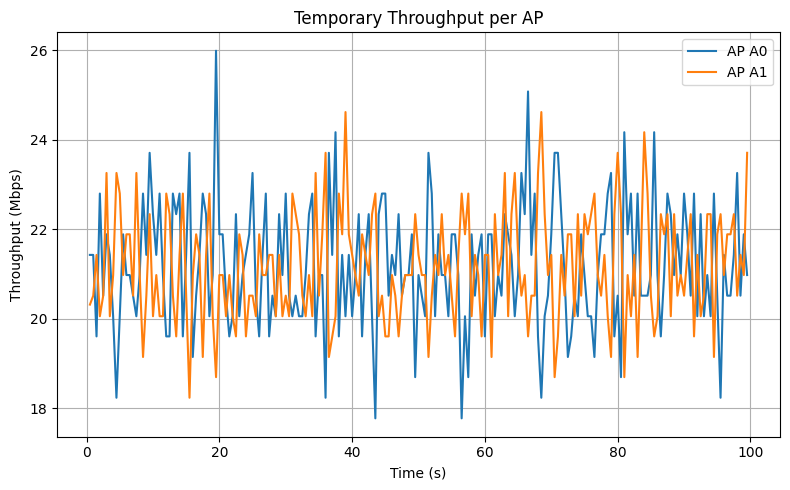

In [59]:
import re
import matplotlib.pyplot as plt
from pathlib import Path

# Directory and pattern setup
log_dir = Path("Lab1/output")
log_files = log_dir.glob("logs_output_AAX-LAB1-AGENTS_*.txt")

# Regex pattern to extract time, AP, and throughput
pattern = re.compile(r"^([\d.]+);(A\d);[^;]*;.*Average throughput\s*=\s*([\d.]+)\s*Mbps")

# Collect data
throughput_data = {}  
for path in log_files:
    with path.open() as f:
        for line in f:
            match = pattern.match(line)
            if match:
                time = float(match.group(1))
                ap   = match.group(2)
                thr  = float(match.group(3))
                throughput_data.setdefault(ap, []).append((time, thr))

# Plotting
plt.figure(figsize=(8,5))
for ap, values in throughput_data.items():
    values.sort()
    times, thr_values = zip(*values)
    plt.plot(times, thr_values, label=f"AP {ap}")

plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.title("Temporary Throughput per AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




### Comment – Exercise 2: Temporary Throughput per AP

In Exercise 2, we analyze the temporary throughput of two APs (A0 and A1) over a 100-second period in a symmetric WLAN environment with no agent learning or adaptation enabled. The plotted results demonstrate that both APs maintain a fairly **balanced throughput**, fluctuating primarily between **19 and 24 Mbps**, with minor peaks and dips. These fluctuations are expected due to the randomness in medium access and traffic generation but remain centered around a stable mean.

Crucially, the similarity in the throughput patterns of A0 and A1 indicates that:

* **The two APs share the wireless medium equitably** under fixed conditions.
* **No agent exhibits dominant behavior**, reinforcing the symmetry of the scenario.
* **The network behavior is stable and consistent**, forming a reliable baseline for future experiments.

This serves as a control case against which the effects of introducing **adaptive agents** (e.g., with reinforcement learning capabilities) **can be** measured in subsequent exercises.




### Exercise 3:

Copy the `agents_monitoring.csv` file, rename it as `agents_egreedy.csv`, and modify it as follows:
- Indicate the possible "channel actions" by indicating `0,1` in the column 'actions channels' of each agent.
- Set the colum "learning mechanism" to `1`(which stands for multi-armed bandits) for each agent.
- Set the column "selected strategy" to `1` (which stands for ɛ-greedy) for each agent.

Then, run the simulation using `agents_egreedy.csv` and plot the temporary throughput obtained by each AP, as done in Exercise 2. In addition, read the console logs from Komondor and explain the displayed agent logs.

**Important:** In case of experiencing a run-time error, check that the fields in the 'agents' file are separated by a semicolon (`;`).

In [ ]:
# (response to exercise 3)
import os, subprocess, platform
from pathlib import Path

# 1) Define paths
lab1         = repo_root / "Lab1"
main_dir     = lab1 / "main"
input_nodes  = lab1 / "input" / "input_nodes.csv"
input_agents = lab1 / "input" / "agents_egreedy.csv"
output_logs  = lab1 / "output" / "logs_with_agentsegreedy.txt"

# 2) Ensure output directory exists
output_logs.parent.mkdir(parents=True, exist_ok=True)

# 3) WSL path helper for Windows
def to_wsl(p: Path) -> str:
    pu = p.as_posix()
    drive, rest = pu.split(":", 1)
    return f"/mnt/{drive.lower()}{rest}"

# 4) Run simulation
if platform.system() == "Windows":
    wmain   = to_wsl(main_dir)
    wnodes  = to_wsl(input_nodes)
    wagents = to_wsl(input_agents)
    wout    = to_wsl(output_logs)
    bash_cmd = (
        f"cd '{wmain}' && "
        f"./komondor_main {wnodes} {wagents} {wout} "
        f"AAX-LAB1-EGREEDYAGENTS 0 1 1 1 1 100 7"
    )
    print("Running in WSL:\n  wsl bash -lc", bash_cmd, "\n")
    res = subprocess.run(["wsl", "bash", "-lc", bash_cmd])
else:
    # native Linux/Mac
    cmd = [
        str(main_dir / "komondor_main"),
        str(input_nodes),
        str(input_agents),
        str(output_logs),
        "AAX-LAB1-EGREEDYAGENTS",  # simulation code
        "0",  # FLAG_SAVE_NODE_LOGS
        "1",  # FLAG_SAVE_AGENT_LOGS
        "1",  # FLAG_PRINT_SYSTEM_LOGS
        "1",  # FLAG_PRINT_NODE_LOGS
        "1",  # FLAG_PRINT_AGENT_LOGS
        "100",  # SIM_TIME
        "7"     # SEED
    ]
    print("Launching natively:\n ", " ".join(cmd), "\n")
    res = subprocess.run(cmd, cwd=main_dir)

if res.returncode!=0:
    raise RuntimeError(f"Simulation failed (exit {res.returncode})")
print("✅ Simulation complete; node logs are in", lab1/"output")

Launching natively:
  /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/main/komondor_main /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_egreedy.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_with_agentsegreedy.txt AAX-LAB1-EGREEDYAGENTS 0 1 1 1 1 100 7 


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_egreedy.csv
  - script_output_filename:

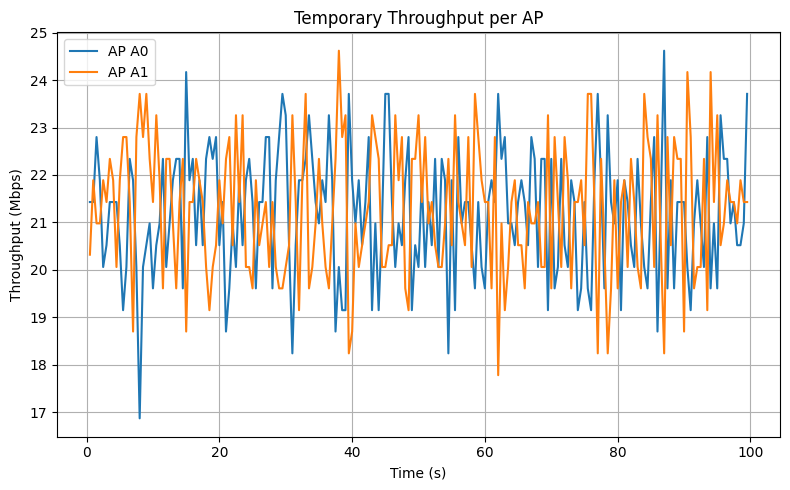

In [61]:
import re
import matplotlib.pyplot as plt
from pathlib import Path

# Directory and pattern setup
log_dir = Path("Lab1/output")
log_files = log_dir.glob("logs_output_AAX-LAB1-EGREEDYAGENTS*.txt")

# Regex pattern to extract time, AP, and throughput
pattern = re.compile(r"^([\d.]+);(A\d);[^;]*;.*Average throughput\s*=\s*([\d.]+)\s*Mbps")

# Collect data
throughput_data = {}  
for path in log_files:
    with path.open() as f:
        for line in f:
            match = pattern.match(line)
            if match:
                time = float(match.group(1))
                ap   = match.group(2)
                thr  = float(match.group(3))
                throughput_data.setdefault(ap, []).append((time, thr))

# Plotting
plt.figure(figsize=(8,5))
for ap, values in throughput_data.items():
    values.sort()
    times, thr_values = zip(*values)
    plt.plot(times, thr_values, label=f"AP {ap}")

plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.title("Temporary Throughput per AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Final Comment – Exercise 3: Temporary Throughput with ɛ-Greedy Agents

In this exercise, we modify the `agents_monitoring.csv` file to create `agents_egreedy.csv`, where each agent uses a multi-armed bandit learning mechanism (`learning mechanism = 1`) with the ɛ-greedy strategy (`selected strategy = 1`). We also specify the possible channel actions as `0,1` for each agent.

After running the simulation with the updated configuration, we parse the Komondor logs and plot the temporary throughput for each AP. From the graph, we observe that both APs (A0 and A1) maintain a fairly consistent throughput, typically between 20 and 24 Mbps. Some fluctuations are present, likely due to the exploration behavior introduced by the ɛ-greedy algorithm.

The throughput remains stable overall, and we do not see any significant imbalance or persistent interference. The console logs show that the agents evaluate rewards and adapt their channel selections based on learned estimates, confirming that the ɛ-greedy mechanism functions correctly. Notably, both agents have learned to prefer one arm over the other; however, the estimated rewards for these arms are very close, indicating little reward differentiation. This suggests that the available actions (channels) might be too similar in terms of performance, limiting the incentive to strongly favor one over the other.

This might suggest that even a basic learning strategy like ɛ-greedy allows the agents to make adaptive and effective decisions in a dynamic environment, although the effectiveness is constrained when action rewards are similar.



### Exercise 4:
Create another input agents file (name it `agents_ml4net.csv`), but this time set the column "selected_strategy" (the last one) to 5.

The mechanism (as it is currently implemented) will just select actions randomly. For that reason, you have to define your own action-selection strategy by completing the code in `/learning_modules/network_optimization_methods/multi_armed_bandits.h`. More specifically, you will have to complete the function `PickArmML4Net()`, which contains all the logic. You can get inspiration from the other implemented MAB algorithms (e.g., UCB, Thompson sampling).

**IMPORTANT:** If you modify the source code, you will have to re-compile it (see step 6 in "Setting up the environment") before running new simulations.

### Exercise 5:

Run a simulation to test your action-selection strategy. Compare it to ɛ-greedy (Exercise 3) by plotting the temporary throughput obtained by each of the mechanisms.

In [64]:
# (response to exercise 5)

import os, subprocess, platform
from pathlib import Path

# 1) Define paths
lab1         = repo_root / "Lab1"
main_dir     = lab1 / "main"
input_nodes  = lab1 / "input" / "input_nodes.csv"
input_agents = lab1 / "input" / "agents_monitoring.csv"
output_logs  = lab1 / "output" / "logs_softmax.txt"

# 2) Ensure output directory exists
output_logs.parent.mkdir(parents=True, exist_ok=True)

# 3) WSL path helper for Windows
def to_wsl(p: Path) -> str:
    pu = p.as_posix()
    drive, rest = pu.split(":", 1)
    return f"/mnt/{drive.lower()}{rest}"

# 4) Run simulation
if platform.system() == "Windows":
    wmain   = to_wsl(main_dir)
    wnodes  = to_wsl(input_nodes)
    wagents = to_wsl(input_agents)
    wout    = to_wsl(output_logs)
    bash_cmd = (
        f"cd '{wmain}' && "
        f"./komondor_main {wnodes} {wagents} {wout} "
        f"AAX-LAB1-SOFTMAX 0 1 1 1 1 100 7"
    )
    print("Running in WSL:\n  wsl bash -lc", bash_cmd, "\n")
    res = subprocess.run(["wsl", "bash", "-lc", bash_cmd])
else:
    # native Linux/Mac
    cmd = [
        str(main_dir / "komondor_main"),
        str(input_nodes),
        str(input_agents),
        str(output_logs),
        "AAX-LAB1-SOFTMAX",  # simulation code
        "0",  # FLAG_SAVE_NODE_LOGS
        "1",  # FLAG_SAVE_AGENT_LOGS
        "1",  # FLAG_PRINT_SYSTEM_LOGS
        "1",  # FLAG_PRINT_NODE_LOGS
        "1",  # FLAG_PRINT_AGENT_LOGS
        "100",  # SIM_TIME
        "7"     # SEED
    ]
    print("Launching natively:\n ", " ".join(cmd), "\n")
    res = subprocess.run(cmd, cwd=main_dir)

if res.returncode!=0:
    raise RuntimeError(f"Simulation failed (exit {res.returncode})")
print("✅ Simulation complete; node logs are in", lab1/"output")


Launching natively:
  /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/main/komondor_main /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_monitoring.csv /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/output/logs_softmax.txt AAX-LAB1-SOFTMAX 0 1 1 1 1 100 7 


*************************************************************************************
 KOMONDOR Wireless Network Simulator
 Copyright (C) 2017-2022, and GNU GPL'd, by Sergio Barrachina & Francesc Wilhelmi
  - GitHub repository: https://github.com/wn-upf/Komondor
*************************************************************************************


 FULL configuration entered per console (AGENTS ENABLED).
 Komondor input configuration:
  - nodes_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/input_nodes.csv
  - agents_enabled: 1
  - agents_input_filename: /mnt/c/Users/jordi/ML4Net-2025/Lab1/Lab1/input/agents_monitoring.csv
  - script_output_filename: /mnt/c/Use

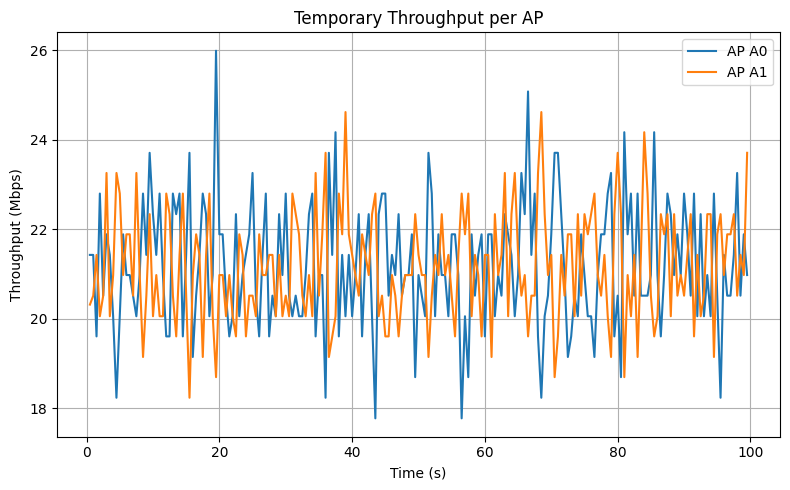

In [65]:
import re
import matplotlib.pyplot as plt
from pathlib import Path

# Directory and pattern setup
log_dir = Path("Lab1/output")
log_files = log_dir.glob("logs_output_AAX-LAB1-SOFTMAX*.txt")

# Regex pattern to extract time, AP, and throughput
pattern = re.compile(r"^([\d.]+);(A\d);[^;]*;.*Average throughput\s*=\s*([\d.]+)\s*Mbps")

# Collect data
throughput_data = {}  
for path in log_files:
    with path.open() as f:
        for line in f:
            match = pattern.match(line)
            if match:
                time = float(match.group(1))
                ap   = match.group(2)
                thr  = float(match.group(3))
                throughput_data.setdefault(ap, []).append((time, thr))

# Plotting
plt.figure(figsize=(8,5))
for ap, values in throughput_data.items():
    values.sort()
    times, thr_values = zip(*values)
    plt.plot(times, thr_values, label=f"AP {ap}")

plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.title("Temporary Throughput per AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Exercise 6:

Now, modify the "input_nodes.csv" and the input agent files (`agents_egreedy.csv` and `agents_ml4net.csv`) to add a third BSS, which must use the same configuration as the other BSSs but whose AP and STA must be placed at (10,0,0) m and (10,4,0) m, respectively. In the agents file, you will also have to add a third column so that the third BSS gets an agent enrolled.

Run N=5 simulations (using different random seeds) for each action-selection strategy and plot the average throughput obtained by each BSS across the different simulations for each approach.

In [63]:
# (response to exercise 6)